In [5]:
!pip install kaggle

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
import os
import shutil

# Create the .kaggle directory
kaggle_dir = os.path.expanduser("~/.kaggle")
os.makedirs(kaggle_dir, exist_ok=True)

# Copy the kaggle.json file to the .kaggle directory
shutil.copy("kaggle.json", os.path.join(kaggle_dir, "kaggle.json"))

# Set the appropriate permissions
os.chmod(os.path.join(kaggle_dir, "kaggle.json"), 0o600)


In [3]:
! kaggle datasets download -d vipoooool/new-plant-diseases-dataset

 99% 2.68G/2.70G [00:26<00:00, 118MB/s]
100% 2.70G/2.70G [00:26<00:00, 110MB/s]


In [4]:
!unzip new-plant-diseases-dataset.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases datase

In [5]:
!pip install fastai

In [6]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import ImageDataLoaders, RandomResizedCrop, Normalize, imagenet_stats


In [8]:
data_path='/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'

In [9]:
dls = ImageDataLoaders.from_folder(
    data_path,
    item_tfms=RandomResizedCrop(460, min_scale=0.75),
    batch_tfms=[Normalize.from_stats(*imagenet_stats)],
    valid_pct=0.2
)


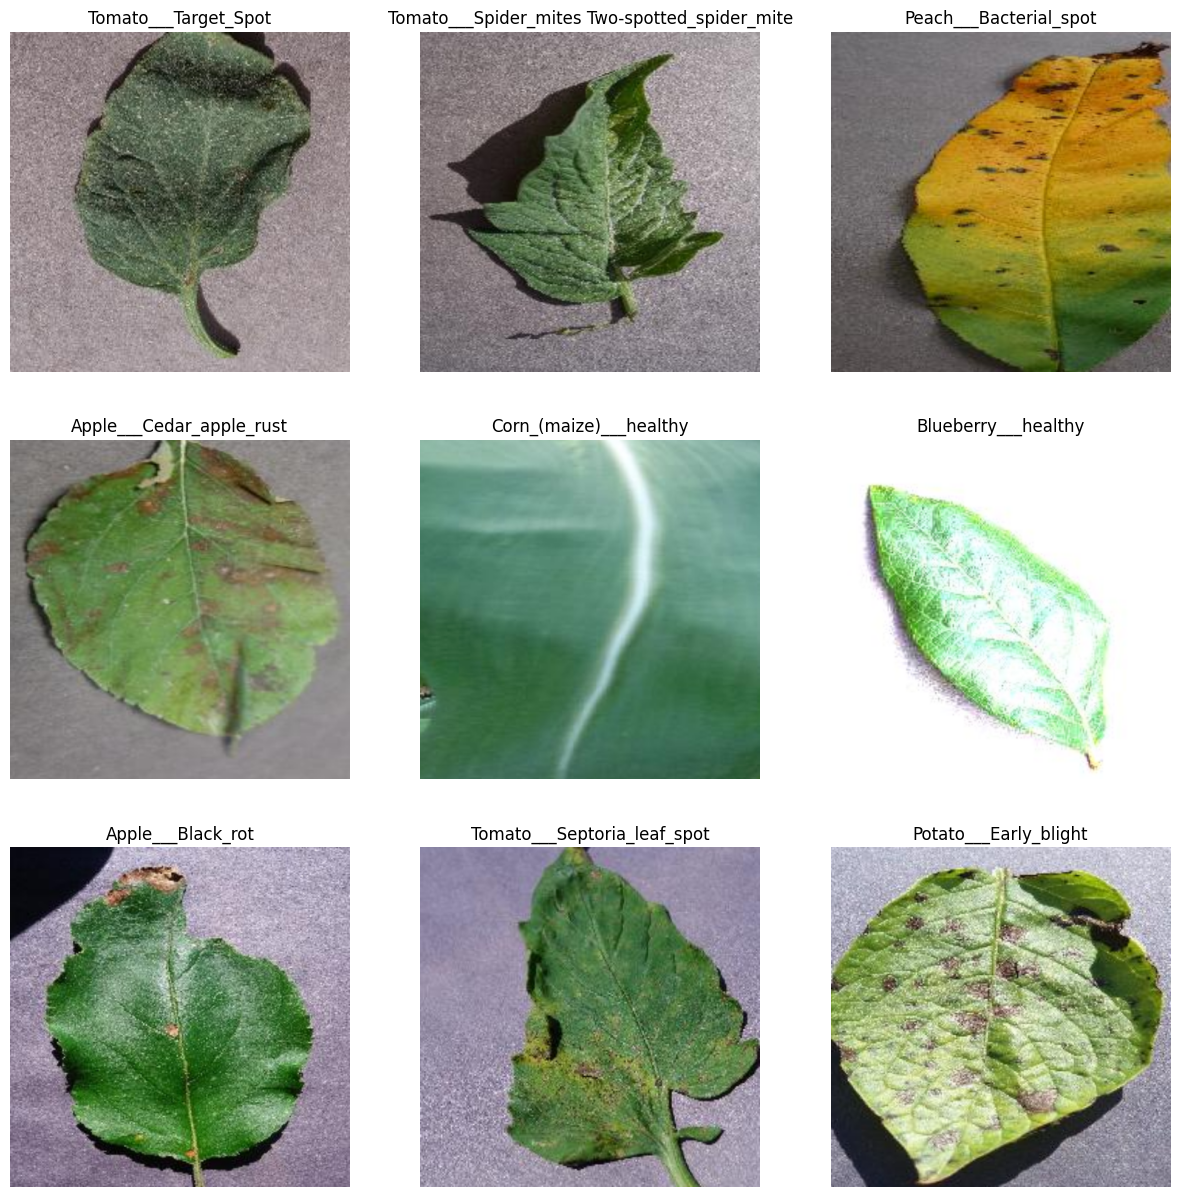

In [10]:
dls.show_batch(figsize=(15,15))

In [11]:
from fastai.vision.all import cnn_learner, error_rate, accuracy, resnet34

In [12]:
learn = cnn_learner(dls,resnet34,metrics=[error_rate,accuracy])

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593

SuggestedLRs(valley=0.0012022644514217973)

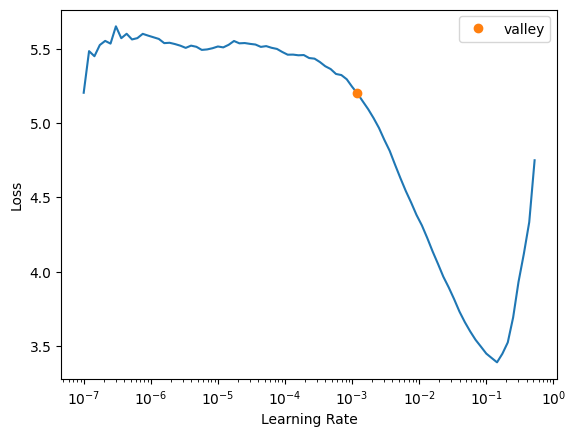

In [13]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(3,0.001)

epoch,train_loss,valid_loss,error_rate,accuracy,time


In [1]:
learn.show_results()

NameError: ignored

In [ ]:
interpretation=Interpretation.from_learner(learn)

In [ ]:
interp2=ClassificationInterpretation.from_learner(learn)

In [ ]:
interp2.plot_confusion_matrix(figsize=(15,10))